<a href="https://colab.research.google.com/github/Akshbhalani/Prediction-of-Apple-Quality-using-Machine-Learning/blob/master/model_Prediction_On_Apple_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [288]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [212]:
df = pd.read_csv('/content/apple_quality.csv')
print(df)

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                           

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [214]:
df['Acidity'].unique()

array(['-0.491590483', '-0.722809367', '2.621636473', ..., '-2.229719806',
       '1.599796456', 'Created_by_Nidula_Elgiriyewithana'], dtype=object)

In [215]:
df[df['Acidity'] == 'Created_by_Nidula_Elgiriyewithana']

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [216]:
newDf = df.drop(index=4000)

In [217]:
print(len(newDf))

4000


In [218]:
print(newDf['Acidity'].unique())

['-0.491590483' '-0.722809367' '2.621636473' ... '-1.334611391'
 '-2.229719806' '1.599796456']


In [219]:
newDf['Acidity'] = newDf['Acidity'].astype(float)

In [220]:
print(newDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB
None


In [221]:
newDf["Quality"] = np.where(newDf["Quality"] == "good", 1,0)

In [222]:
print(newDf)


        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  Quality  
0

In [223]:
print(newDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 281.4 KB
None


In [224]:
newDf.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


In [225]:
x = newDf.drop(['Quality'], axis=1).values
y = newDf['Quality'].values

In [226]:
print(x)

[[ 0.00000000e+00 -3.97004852e+00 -2.51233638e+00 ...  1.84490036e+00
   3.29839797e-01 -4.91590483e-01]
 [ 1.00000000e+00 -1.19521719e+00 -2.83925653e+00 ...  8.53285795e-01
   8.67530082e-01 -7.22809367e-01]
 [ 2.00000000e+00 -2.92023862e-01 -1.35128199e+00 ...  2.83863551e+00
  -3.80333280e-02  2.62163647e+00]
 ...
 [ 3.99700000e+03 -2.63451530e+00 -2.13824672e+00 ...  2.19970859e+00
   4.76385918e+00 -1.33461139e+00]
 [ 3.99800000e+03 -4.00800374e+00 -1.77933711e+00 ...  2.16143512e+00
   2.14488384e-01 -2.22971981e+00]
 [ 3.99900000e+03  2.78539650e-01 -1.71550503e+00 ...  1.26667740e+00
  -7.76571470e-01  1.59979646e+00]]


In [227]:
print(y)

[1 1 0 ... 0 1 1]


In [228]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 0)

In [229]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [230]:
LogisticRegression_y_pred = LogisticRegression_model.predict(x_test)
print(LogisticRegression_y_pred)

[0 1 1 ... 1 1 0]


In [231]:
len(x_train)

2800

In [232]:
len(x_test)

1200

In [233]:
LogisticRegression_model.predict_proba(x_test)

array([[0.93089603, 0.06910397],
       [0.45917602, 0.54082398],
       [0.12007451, 0.87992549],
       ...,
       [0.4748558 , 0.5251442 ],
       [0.35135425, 0.64864575],
       [0.60308925, 0.39691075]])

In [234]:
round(LogisticRegression_model.score(x_test, y_test),2)

0.73

In [235]:
from sklearn.metrics import confusion_matrix

In [236]:
LogisticRegression_cm = confusion_matrix(y_test, LogisticRegression_y_pred)
LogisticRegression_cm

array([[443, 169],
       [157, 431]])

Text(50.722222222222214, 0.5, 'truth')

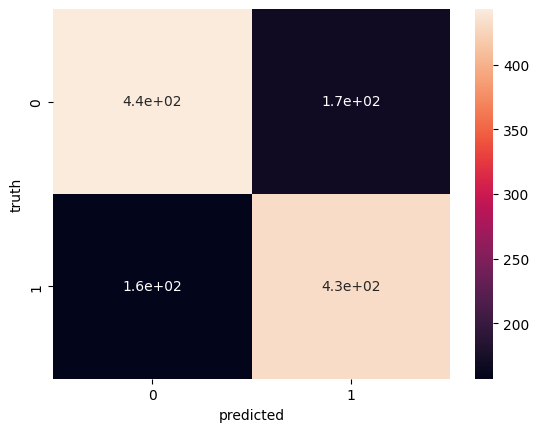

In [237]:
import seaborn as sn
sn.heatmap(LogisticRegression_cm, annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [238]:
from sklearn import tree

In [239]:
decisionTree_model = tree.DecisionTreeClassifier()

In [240]:
decisionTree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [241]:
decisionTree_model_Y_pred = decisionTree_model.predict(x_test)

In [242]:
decisionTree_model_Y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [243]:
y_test

array([0, 1, 1, ..., 0, 1, 1])

In [244]:
round(decisionTree_model.score(x_test,y_test),2)

0.77

In [245]:
decisionTree_model_cm = confusion_matrix(y_test, decisionTree_model_Y_pred)
print(decisionTree_model_cm)

[[475 137]
 [136 452]]


Text(50.722222222222214, 0.5, 'truth')

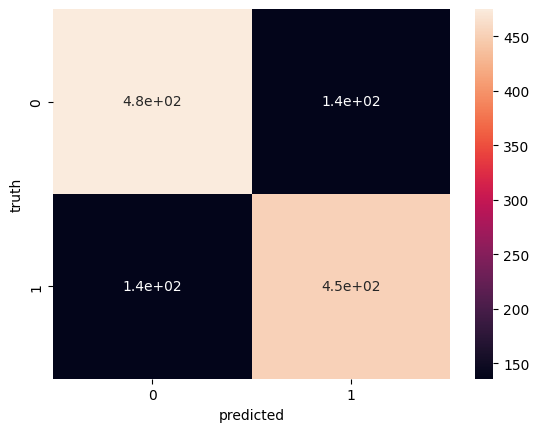

In [246]:
sn.heatmap(decisionTree_model_cm, annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [247]:
from sklearn.svm import SVC

In [248]:
SVM_model = SVC()

In [249]:
SVM_model.fit(x_train, y_train)

SVC()

In [250]:
SVM_Y_pred = SVM_model.predict(x_test)

In [251]:
print(SVM_Y_pred)

[1 1 1 ... 1 1 1]


In [252]:
SVM_model.score(x_test, y_test)

0.49

In [253]:
SVM_cm = confusion_matrix(y_test, SVM_Y_pred)
print(SVM_cm)

[[  0 612]
 [  0 588]]


Text(50.722222222222214, 0.5, 'truth')

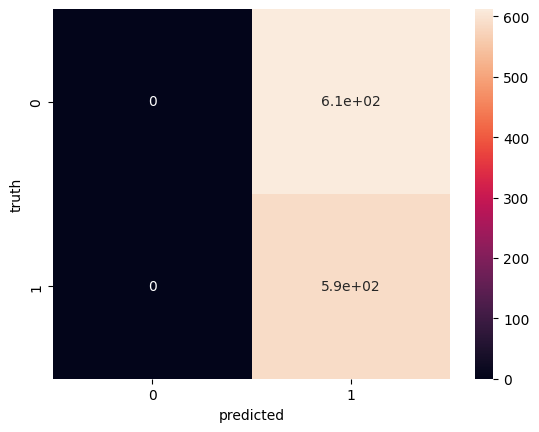

In [254]:
sn.heatmap(SVM_cm, annot = True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
RandomForestClassifier_model = RandomForestClassifier(n_estimators=100)
RandomForestClassifier_model.fit(x_train, y_train)

RandomForestClassifier()

In [257]:
RandomForestClassifier_Y_pred = RandomForestClassifier_model.predict(x_test)

In [258]:
print(RandomForestClassifier_Y_pred)

[0 1 1 ... 0 1 1]


In [259]:
print(y_test)

[0 1 1 ... 0 1 1]


In [260]:
RandomForestClassifier_model.score(x_test, y_test)

0.8716666666666667

In [261]:
RandomForestClassifier_cm = confusion_matrix(y_test, RandomForestClassifier_Y_pred)
RandomForestClassifier_cm

array([[522,  90],
       [ 64, 524]])

Text(50.722222222222214, 0.5, 'Truth')

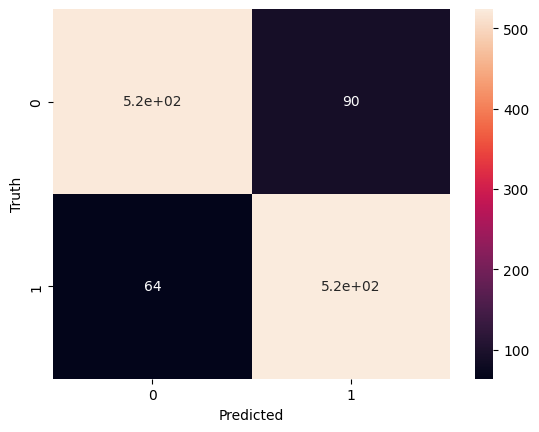

In [262]:
sn.heatmap(RandomForestClassifier_cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [263]:
from tabulate import tabulate

In [264]:
data = [
    ['LogisticRegression', round(LogisticRegression_model.score(x_test, y_test),2)],
    ['Decision Tree', round(decisionTree_model.score(x_test,y_test),2)],
    ['SVM', round(SVM_model.score(x_test,y_test),2)],
    ['Random Forest', round(RandomForestClassifier_model.score(x_test,y_test),2)]
]

head = ['Models', 'Score']

print(tabulate(data, headers = head))

Models                Score
------------------  -------
LogisticRegression     0.73
Decision Tree          0.77
SVM                    0.49
Random Forest          0.87


In [265]:
Positive_Size_Df = newDf[newDf['Size'] > 0]
print(Positive_Size_Df.head(10))

    A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
4    4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
6    6.0  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417   
11  11.0  2.450960 -0.564177  -1.635041     0.942400  -2.087317  1.214322   
14  14.0  2.839581 -0.344798  -1.019797     0.894581  -1.300061  0.582379   
21  21.0  1.177593 -0.721654  -1.387116     7.619852   1.069288 -3.734805   
23  23.0  0.135714 -0.753757  -2.196146     1.039276   0.580538  0.227309   
24  24.0  0.522961 -1.428085  -0.743519     1.786716  -4.207544 -1.825231   
27  27.0  1.999831  0.669990  -2.099616     2.645819  -0.989496  0.373330   
28  28.0  1.446052  1.656692  -1.777521     1.708962  -0.341670 -1.322439   
30  30.0  0.410492 -2.260290  -3.335948    -0.285205  -2.733844  2.585986   

     Acidity  Quality  
4   0.501984        1  
6   2.414171        1  
11  1.294324        1  
14  1.709708        1  
21  2.642948        1  
23  2.08

In [266]:
print(len(Positive_Size_Df))

1599


In [267]:
PositiveX = Positive_Size_Df.drop('Quality', axis=1).values
PositiveY = Positive_Size_Df['Quality']

In [268]:
PositiveX

array([[ 4.00000000e+00,  1.36421682e+00, -1.29661188e+00, ...,
         3.03087435e+00, -1.30384943e+00,  5.01984036e-01],
       [ 6.00000000e+00,  1.33160574e+00,  1.63595571e+00, ...,
         3.10634445e+00, -1.84741673e+00,  2.41417051e+00],
       [ 1.10000000e+01,  2.45095984e+00, -5.64177407e-01, ...,
        -2.08731667e+00,  1.21432169e+00,  1.29432393e+00],
       ...,
       [ 3.99400000e+03,  1.48250801e+00, -2.58118132e+00, ...,
         1.05636124e+00,  2.56082901e+00, -1.22925459e+00],
       [ 3.99500000e+03,  5.93864350e-02, -1.06740844e+00, ...,
         1.69798630e+00,  2.24405472e+00,  1.37784369e-01],
       [ 3.99900000e+03,  2.78539650e-01, -1.71550503e+00, ...,
         1.26667740e+00, -7.76571470e-01,  1.59979646e+00]])

In [269]:
PositiveY

4       1
6       1
11      1
14      1
21      1
       ..
3992    1
3993    0
3994    1
3995    0
3999    1
Name: Quality, Length: 1599, dtype: int64

In [270]:
PositiveX_train, PositiveX_test, PositiveY_train, PositiveY_test = train_test_split(PositiveX, PositiveY, test_size = 0.2, random_state=0)

In [271]:
decisionTree_PositiveModel = tree.DecisionTreeClassifier()

In [272]:
decisionTree_PositiveModel.fit(PositiveX_train, PositiveY_train)

DecisionTreeClassifier()

In [273]:
decisionTree_PositiveY_pred = decisionTree_PositiveModel.predict(PositiveX_test)

In [274]:
print(decisionTree_PositiveY_pred)

[0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0
 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1]


In [275]:
decisionTree_PositiveModel.score(PositiveX_test, PositiveY_test)

0.8

In [276]:
decisionTree_PositiveCM = confusion_matrix(PositiveY_test, decisionTree_PositiveY_pred)

In [277]:
print(decisionTree_PositiveCM)

[[ 87  37]
 [ 27 169]]


Text(50.722222222222214, 0.5, 'Predicted')

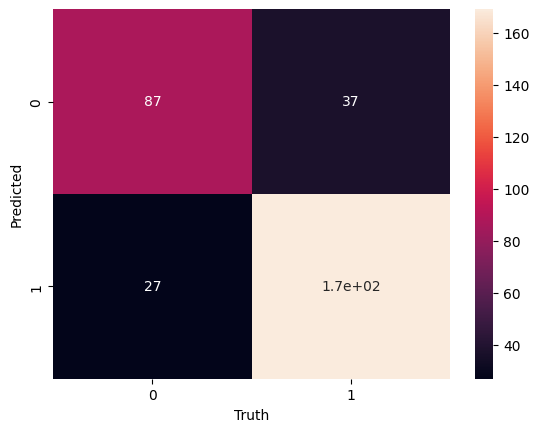

In [278]:
sn.heatmap(decisionTree_PositiveCM, annot= True)
plt.xlabel("Truth")
plt.ylabel("Predicted")

In [279]:
RandomForestClassifier_Model = RandomForestClassifier()

In [280]:
RandomForestClassifier_Model.fit(PositiveX_train, PositiveY_train)

RandomForestClassifier()

In [281]:
RandomForestClassifier_PositiveY_pred = RandomForestClassifier_Model.predict(PositiveX_test)

In [282]:
print(RandomForestClassifier_PositiveY_pred)

[0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1]


In [283]:
RandomForestClassifier_Model.score(PositiveX_test, PositiveY_test)

0.815625

In [284]:
RandomForestClassifier_PositiveCM = confusion_matrix(PositiveY_test, RandomForestClassifier_PositiveY_pred)

In [285]:
print(RandomForestClassifier_PositiveCM)

[[ 83  41]
 [ 18 178]]


Text(50.722222222222214, 0.5, 'Predicted')

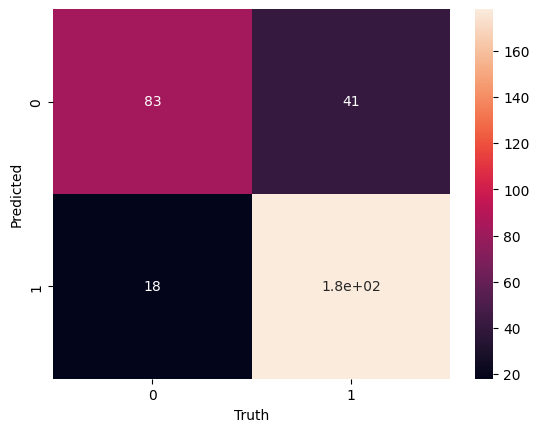

In [286]:
sn.heatmap(RandomForestClassifier_PositiveCM, annot= True)
plt.xlabel("Truth")
plt.ylabel("Predicted")

In [287]:
Positive_data = [
    ['Decision Tree', round(decisionTree_PositiveModel.score(PositiveX_test, PositiveY_test),2)],
    ['Random Forest', round(RandomForestClassifier_Model.score(PositiveX_test, PositiveY_test),2)]
]

head = ['Models', 'Score']

print(tabulate(Positive_data, headers = head))

Models           Score
-------------  -------
Decision Tree     0.8
Random Forest     0.82
